# Task
    Create a confusion matrix in order to Minimize the False predication

In [1]:
## Imports Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler , OneHotEncoder ,LabelEncoder ,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score,confusion_matrix ,accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [2]:
## 1- prepare the data set according to need (numeric)

data = pd.read_csv("../DataSets/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
##
data["Surname"].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [4]:
## Drop unnecessary features

data.drop(["RowNumber","CustomerId"],axis=1 ,inplace = True)

In [5]:
## check for missing values to Clean and preprocess data

print("Duplicated Values",data.duplicated().sum())
data.isna().sum()

Duplicated Values 0


Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df = data.dropna()
#now check for duplicates
df.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
## Check for y_values
outLabel = df["Exited"].value_counts()
outLabel

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
data.head(1)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [9]:
##  Now do the preprocessing ( Label Encoding & StandardScaling)


X = df.drop("Exited",axis=1)
Y = df["Exited"]

sampler = RandomOverSampler(sampling_strategy='auto',random_state=0)
x_sampled ,y_sampled = sampler.fit_resample(X,Y)
scaling = StandardScaler()
encoder = OneHotEncoder()

category =["Surname","Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
numerical = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]


transform = ColumnTransformer([("numerical",scaling,numerical),
                               ("category",encoder,category)],remainder="passthrough")

trans_x =  transform.fit_transform(x_sampled)
trans_x


<15926x2950 sparse matrix of type '<class 'numpy.float64'>'
	with 175186 stored elements in Compressed Sparse Row format>

In [10]:
trans_x.shape

(15926, 2950)

In [11]:
# train _test_split
np.random.seed(42)
x_train ,x_test ,y_train ,y_test = train_test_split(trans_x , y_sampled,test_size =0.3 ,random_state = 42)


In [12]:
 ## import necessary libraries/frameworks
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(units = 128 , activation = "relu" ,input_shape=(2950,)))

model.add(Dense(units = 64 ,activation = "relu"))

model.add(Dense(2 ,activation = "softmax"))

model.compile(optimizer='adam', loss="binary_crossentropy",metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               377728    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 386114 (1.47 MB)
Trainable params: 386114 (1.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
## Encode y_labels using onehotencoder

from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test) 

model.fit(x_train ,y_train_encoded ,batch_size = 32 ,epochs = 10)

Epoch 1/10
349/349 [==============================] - 5s 10ms/step - loss: 0.4903 - accuracy: 0.7673
Epoch 2/10
349/349 [==============================] - 4s 10ms/step - loss: 0.3240 - accuracy: 0.8656
Epoch 3/10
349/349 [==============================] - 4s 11ms/step - loss: 0.1984 - accuracy: 0.9256
Epoch 4/10
349/349 [==============================] - 4s 11ms/step - loss: 0.1125 - accuracy: 0.9607
Epoch 5/10
349/349 [==============================] - 4s 11ms/step - loss: 0.0618 - accuracy: 0.9818
Epoch 6/10
349/349 [==============================] - 3s 10ms/step - loss: 0.0378 - accuracy: 0.9895
Epoch 7/10
349/349 [==============================] - 4s 10ms/step - loss: 0.0223 - accuracy: 0.9944
Epoch 8/10
349/349 [==============================] - 3s 10ms/step - loss: 0.0151 - accuracy: 0.9962
Epoch 9/10
349/349 [==============================] - 3s 10ms/step - loss: 0.0102 - accuracy: 0.9973
Epoch 10/10
349/349 [==============================] - 4s 12ms/step - loss: 0.0109 - accura

In [15]:
## Predict the value
y_predict_encoded = model.predict(x_test)
y_pred = np.argmax(y_predict_encoded,axis = 1)
y_pred

150/150 [==============================] - 1s 3ms/step


array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC Score (only applicable for binary classification tasks)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[2082  344]
 [  94 2258]]

Accuracy: 0.9083298451234826
Precision: 0.8677940046118371
Recall: 0.9600340136054422
F1-Score: 0.9115865966895438
ROC-AUC Score: 0.9091184082866453


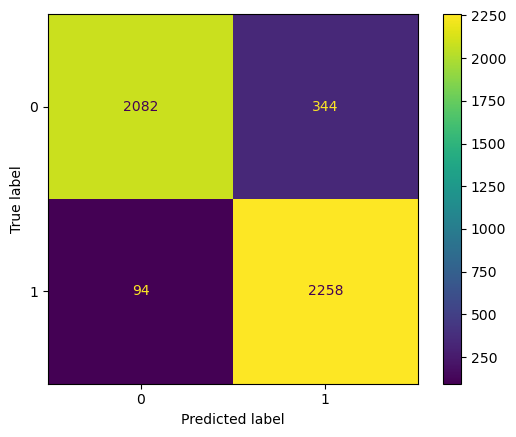

In [17]:
## Confusion mAtrix
dist = ConfusionMatrixDisplay(cm)
dist.plot()